<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea5/minimo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

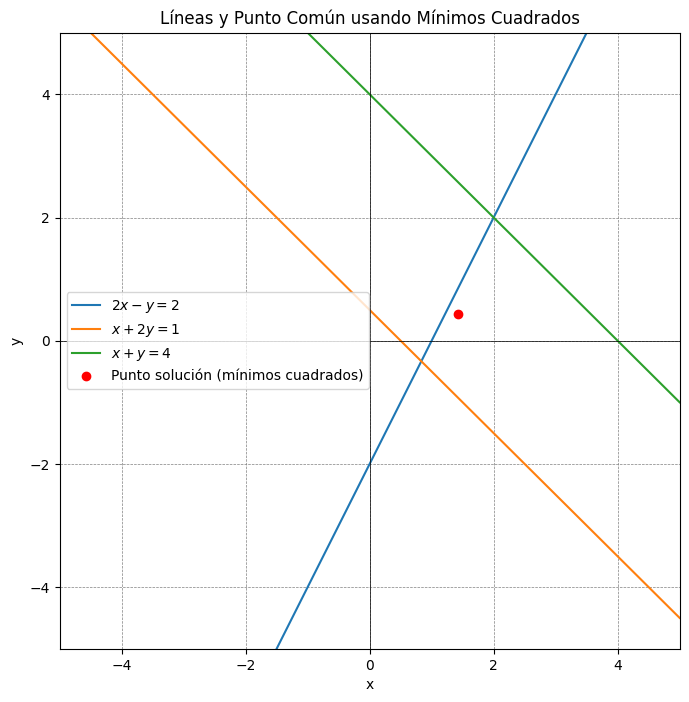

El punto solución con minimos cuadrados es [1.42857143 0.42857143]


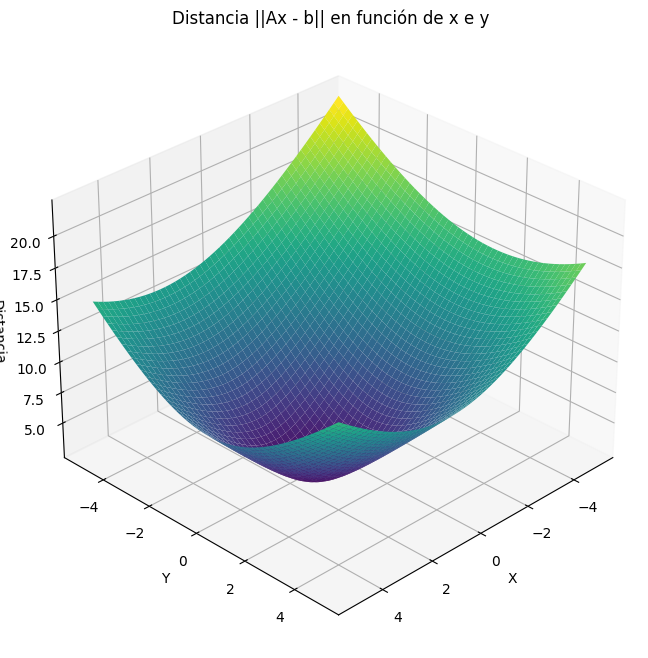

El punto solución minimizando la distancia es (1.4264264264264268, 0.4254254254254253) con una distancia de 2.535482580330301


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

# Definimos las ecuaciones de las líneas
# 2x - y = 2 -> -2x + y = -2
# x + 2y = 1 -> -2x - 2y = -1
# x + y = 4 -> -x - y = -4

# Configuramos las matrices para el método de mínimos cuadrados
A = np.array([[2, -1],
              [1, 2],
              [1, 1]])

b = np.array([2, 1, 4])

# Resolución por mínimos cuadrados para encontrar el punto común (x, y)
point, _, _, _ = lstsq(A, b)

# Definimos los valores de las funciones para graficar las líneas
x_vals = np.linspace(-5, 5, 400)
line1 = (2 * x_vals) - 2
line2 = (1 - 2 * x_vals) / 2
line3 = 4 - x_vals

# Graficamos las tres líneas y el punto solución encontrado
plt.figure(figsize=(8, 8))
plt.plot(x_vals, line1, label=r'$2x - y = 2$')
plt.plot(x_vals, line2, label=r'$x + 2y = 1$')
plt.plot(x_vals, line3, label=r'$x + y = 4$')
plt.plot(point[0], point[1], 'ro', label='Punto solución (mínimos cuadrados)')

# Configuraciones del gráfico
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Líneas y Punto Común usando Mínimos Cuadrados")

plt.show()
print(f"El punto solución con minimos cuadrados es {point}")
# Generamos los rangos de valores de x e y
x_rango = np.linspace(-5, 5, 1000)
y_rango = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x_rango, y_rango)

# Calculamos la distancia en cada punto de la malla con una función vectorizada
def calcular_distancia_malla(A, b, X, Y):
    puntos = np.stack((X.ravel(), Y.ravel()), axis=-1)
    distancias = np.linalg.norm(A @ puntos.T - b[:, None], axis=0)
    return distancias.reshape(X.shape)

# Calculamos la distancia mínima y el punto correspondiente
distancias = calcular_distancia_malla(A, b, X, Y)
minimo_distancia = distancias.min()
min_idx = np.unravel_index(np.argmin(distancias), distancias.shape)
minimo_punto = (X[min_idx], Y[min_idx])

# Gráfica de la superficie 3D de la distancia
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, distancias, cmap='viridis', edgecolor='none')
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distancia')
ax.set_title('Distancia ||Ax - b|| en función de x e y')
plt.show()

print(f"El punto solución minimizando la distancia es {minimo_punto} con una distancia de {minimo_distancia}")




este punto se puede interpretar como el punto donde las 3 lineas estan mas cerca, pues es evidente que este no pasa por las 3 lineas.